<a href="https://colab.research.google.com/github/dgatti/PortfolioBigData/blob/main/PrimerosPasosPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd


## **Primeros pasos con Python**
**Cargar un DataSet y generar un pequeño gráfico**

In [ ]:
datos=pd.read_excel("/content/drive/MyDrive/Curso Python/frutas.xlsx")
DF=pd.DataFrame(datos)

In [ ]:
for i in datos.index:
  print("Peso fruta {} = {}".format(i,datos['mass'][i])) #Probando .format para formatear el tipo de dato

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
ejex=np.array(datos['fruit_name'])
ejey=np.array(datos['mass'])
ejey2=np.array(datos['color_score'].values)

nombre_fruta=np.unique(datos['fruit_name'].values) #probando el .unique

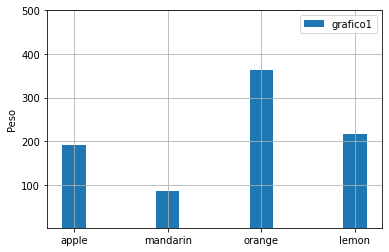

In [ ]:
ancho_barra=0.25
plt.bar(ejex,ejey,width=ancho_barra,label='grafico1')
#plt.bar(ejex+ancho_barra,ejey2,width=ancho_barra,label='grafico2') 
plt.ylabel('Peso')
plt.grid(True)
plt.legend()
plt.ylim(1,500)
plt.show()

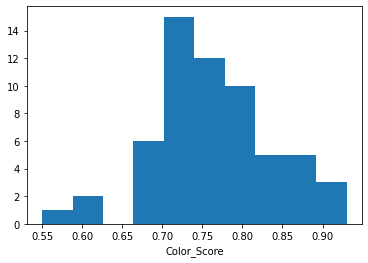

In [ ]:
plt.hist(ejey2)
plt.xlabel('Color_Score')
plt.show()

 **Probando el armado de listas**


In [ ]:
datos=pd.read_csv("/content/drive/MyDrive/Curso Python/Indicators.csv")

In [ ]:
datos.head(10)

In [ ]:
datos.shape

In [ ]:
codigo_paises=datos["CountryCode"].unique().tolist() #Crea una lista, .tolist(), con los registros de CountryCode del DataSet, valores ùnicos, que no se repitan (.unique())
len(codigo_paises)

247

In [ ]:
descrip_indicadores=datos["IndicatorName"].unique().tolist()
print(descrip_indicadores[:10])
len(descrip_indicadores)

['Adolescent fertility rate (births per 1,000 women ages 15-19)', 'Age dependency ratio (% of working-age population)', 'Age dependency ratio, old (% of working-age population)', 'Age dependency ratio, young (% of working-age population)', 'Arms exports (SIPRI trend indicator values)', 'Arms imports (SIPRI trend indicator values)', 'Birth rate, crude (per 1,000 people)', 'CO2 emissions (kt)', 'CO2 emissions (metric tons per capita)', 'CO2 emissions from gaseous fuel consumption (% of total)']


1344

In [ ]:
años=datos["Year"].unique().tolist()
len(años)
print(min(años),'-',max(años))

1960 - 2015


**Continuando con los gráficos**

In [ ]:
indicador_key='CO2 emissions \(metric tons per capita'
pais_key='BRA'

filtro1=datos['IndicatorName'].str.contains(indicador_key) #crea una lista recuperando los registros que contienen el valor indicado
filtro2=datos['CountryCode'].str.contains(pais_key)
datos_filtrados=datos[filtro1 & filtro2] #Genera un nuevo data set solo con registros que contienen la información key

datos_filtrados.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5642,Brazil,BRA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.647068
29722,Brazil,BRA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,0.658625
56759,Brazil,BRA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,0.697281
85147,Brazil,BRA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,0.700749
113859,Brazil,BRA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,0.694001


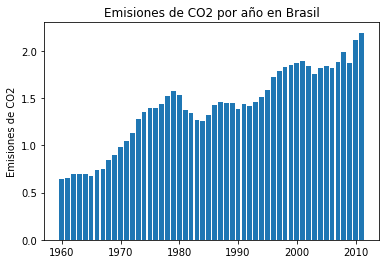

In [ ]:
años=datos_filtrados['Year']
co2=datos_filtrados['Value']
plt.title('Emisiones de CO2 por año en Brasil')
plt.ylabel('Emisiones de CO2')
plt.bar(años,co2)
plt.show()

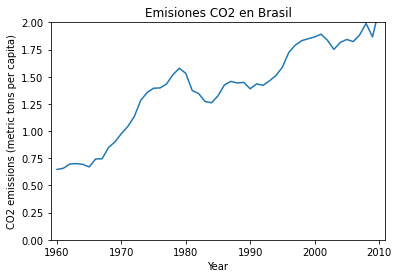

In [ ]:
años_a=datos_filtrados['Year'].values #en este caso, se crea un array con los registros que contienen el valor indicado
co2_a=datos_filtrados['Value'].values
plt.plot(años_a,co2_a) 
plt.xlabel('Year')
plt.ylabel(datos_filtrados['IndicatorName'].iloc[0]) #selecciona un elemento del dataF y lo asigna como etiqueta
plt.title('Emisiones CO2 en Brasil')
plt.axis([1959,2011,0,2])
plt.show()

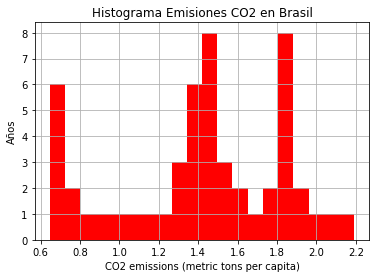

In [ ]:
plt.hist(datos_filtrados['Value'].values,20,facecolor='red')
plt.xlabel(datos_filtrados['IndicatorName'].iloc[0])
plt.ylabel('Años')
plt.title('Histograma Emisiones CO2 en Brasil')
plt.grid(True)
plt.show()

In [ ]:
from sklearn import datasets
iris=datasets.load_iris()

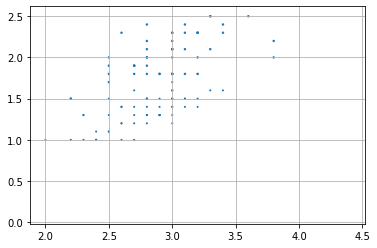

In [ ]:
x=iris.data[:,1]
y=iris.data[:,3]
colors=iris.target
plt.scatter(x,y,colors)
plt.grid(True)
plt.show()

## **Manejo de valores Nulos con Pandas**

In [3]:
#Crear valores nulos
Vector_A=pd.Series([1,2,3,np.NaN])
vector_B=pd.Series([1,2,3,None])

In [5]:
#Como reemplazar nulos
Prueba_Nulos=pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, 5],
                   [np.nan, 3, np.nan, 4]],
                   columns=list("ABCD"))
Prueba_Nulos

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5
3,NaN,3.0,NaN,4


In [7]:
values = {"A": 0, "B": 1, "C": 2, "D": 3} #asocio valores específicos a las columnas
values

{'A': 0, 'B': 1, 'C': 2, 'D': 3}

In [8]:
Prueba_Nulos.fillna(value=values) #reemplazo temporal de los nulos

,A,B,C,D
0,0.0,2.0,2.0,0
1,3.0,4.0,2.0,1
2,0.0,1.0,2.0,5
3,0.0,3.0,2.0,4


In [9]:
Prueba_Nulos.fillna(value=values, inplace=True) #reemplazo permanente

In [27]:
#Ejemplo para caso de variables umèricas.
Prueba_Nulos_Num=pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, 5],
                   [np.nan, 3, np.nan, 4]],
                   columns=list("ABCD"))

In [28]:
Prueba_Nulos_Num['B'].mean()

3.0

In [29]:
Prueba_Nulos_Num['B']=Prueba_Nulos_Num['B'].fillna(value=Prueba_Nulos_Num['B'].mean()) #Reempalza con fillna los nulos de la columna B con la media generada por los valores no nulos de la columna B
Prueba_Nulos_Num

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,3.0,NaN,5
3,NaN,3.0,NaN,4


## **Filtrar datos con Panda Query**

In [30]:
Prueba_Nulos_Num.query("B>=3")

,A,B,C,D
1,3.0,4.0,NaN,1
2,NaN,3.0,NaN,5
3,NaN,3.0,NaN,4


In [31]:
Prueba_Nulos_Num.query("B>=3 and D==5")

,A,B,C,D
2,NaN,3.0,NaN,5


In [32]:
Prueba_Nulos_Num.query("B<3 or D > 1")

,A,B,C,D
0,NaN,2.0,NaN,0
2,NaN,3.0,NaN,5
3,NaN,3.0,NaN,4


## **Pandas Profiling para análisis estadísitico inicial**

In [33]:
%%capture 
!pip install pandas-profiling==2.7.1

In [34]:
from pandas_profiling import ProfileReport


In [36]:
DataSetPrueba=pd.read_csv(filepath_or_buffer="/content/drive/MyDrive/PythonColab/Curso Python/Indicators.csv", sep=',')

In [37]:
from google.colab.data_table import DataTable #Para mosrarlo como una tabla excel..

In [43]:
DataTable(DataSetPrueba.head())

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [54]:
#Creando una nueva variable/columna
# Pasando a metros la altura
DataSetPrueba['Value/100']=DataSetPrueba['Value']/100

DataSetPrueba.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value,Value/100
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02,1.335609
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01,0.877976
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00,0.066346
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01,0.810233
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06,30000.000000


In [51]:
ProfileReport(DataSetPrueba.head(20))

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]